In [8]:
import tensorflow as tf

x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
f = x*x*y + y + 2

In [9]:
sess=tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result=sess.run(f)
print(result)
sess.close()

42


In [10]:
with tf.Session() as s:
    x.initializer.run()
    y.initializer.run()
    res=f.eval()


In [11]:
import numpy as np
#from sklearn.datasets import fetch_california_housing
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

#housing=fetch_california_housing();

#init = tf.initialize_all_variables()
#X=tf.constant(np.c_[np.ones((len(housing.data),1)),housing.data],name="X")
#y=tf.constant(housing.target.reshape(-1,1),name="y")

#f=tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(tf.transpose(X),X)),tf.transpose(X)),y)
#with tf.Session() as s:
#    init.run()
#    theta=f.eval()
#print(theta)

#v=pd.DataFrame(data=housing.data,columns=housing.feature_names)
#v.head(5)


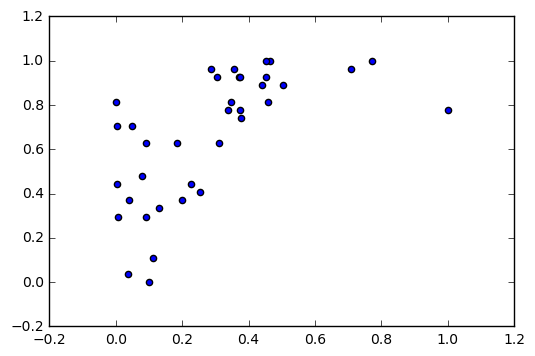

In [12]:
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

gdp_per_capita = pd.read_csv("gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)

happy=pd.read_csv("oecd_bli_2015.csv", thousands=',')
happy=happy[happy["INEQUALITY"]=="TOT"]
happy=happy.pivot(index="Country",columns="Indicator", values="Value")
d=pd.merge(left=happy,right=gdp_per_capita,left_index=True,right_index=True)

d=d[["GDP per capita","Life satisfaction"]]
d=MinMaxScaler().fit_transform(d)
X=d[:,0]
y=d[:,1]

l=linear_model.LinearRegression()
l.fit(np.c_[X],np.c_[y])
l.coef_

plt.scatter(X,y)
lineX=np.linspace(0,115000,1000)
#plt.plot(lineX,l.intercept_[0]+l.coef_[0][0]*lineX)
plt.show()



0.0545189606715


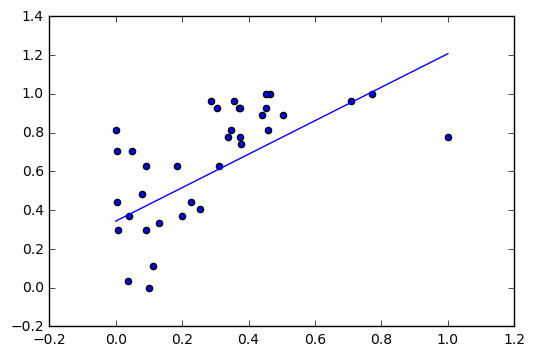

0.049527383384


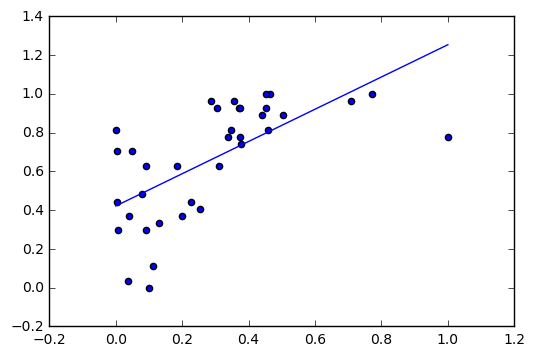

0.0494833619249


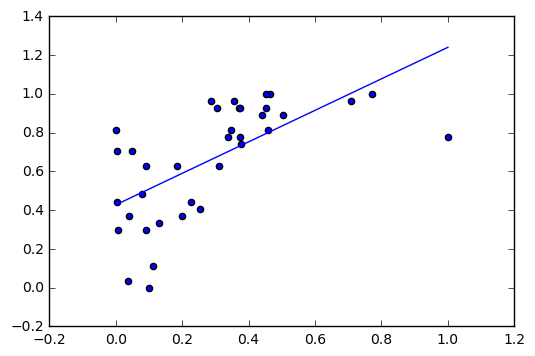

0.0494769486097


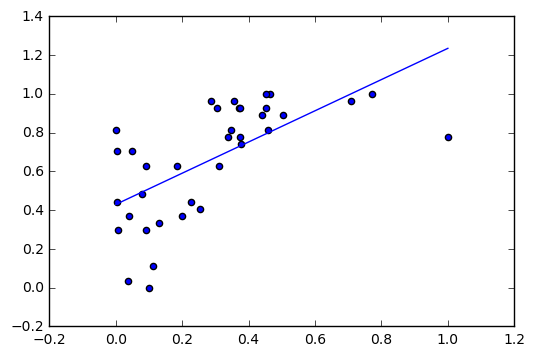

0.0494760142787


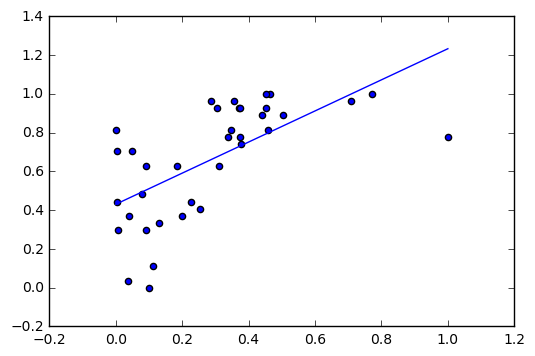

0.0494758781597


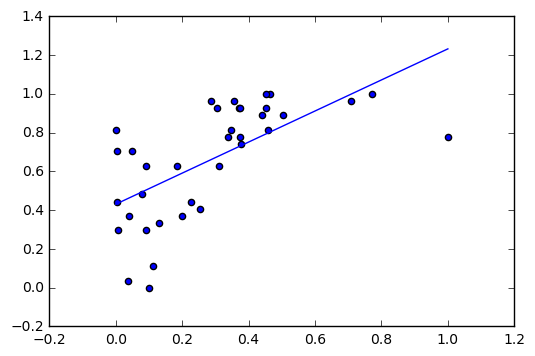

0.049475858329


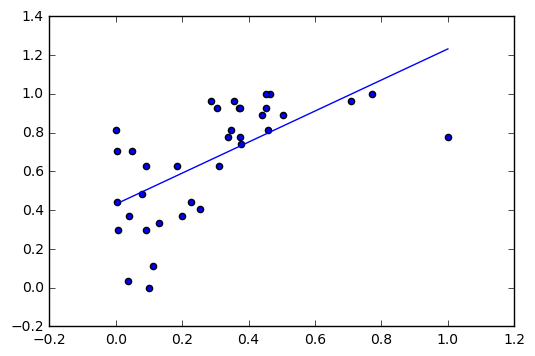

0.04947585544


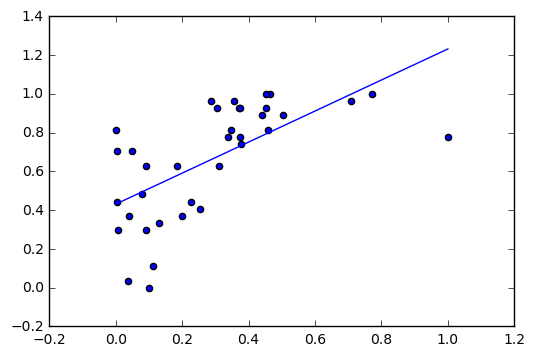

0.0494758550191


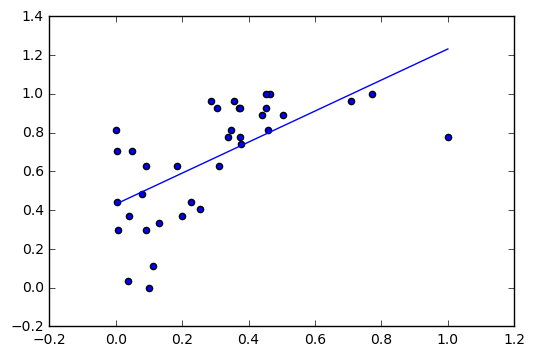

0.0494758549578


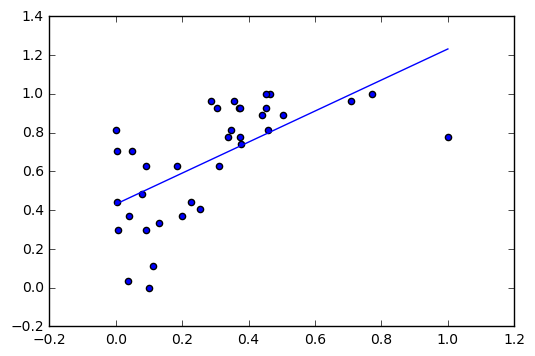

In [13]:
epochs=10000


m=float(len(X))

init=tf.initialize_all_variables()
theta=tf.Variable(tf.random_uniform([2,1],dtype=tf.float64),name="theta")
tx=tf.constant(np.c_[np.ones((len(X),1)),X],name="tx")
ty=tf.constant(np.c_[y],name="ty")
ypred=tf.matmul(tx,theta, name="ypred")
error=ypred-ty
mse=tf.reduce_mean(tf.square(ypred-ty), name="mse")
gradient=2/m*tf.matmul(tf.transpose(tx),error)
cont_loop=tf.assign(theta,theta-(learning_rate*gradient))

lineX=np.linspace(0,1.0,1000)
with tf.Session() as sess:
    theta.initializer.run()
    for i in range(epochs):
        if(i%1000==0):
            print(mse.eval())
            ptheta=theta.eval()
            plt.scatter(X,y)
            plt.plot(lineX,ptheta[0,0]+ptheta[1,0]*lineX)
            plt.show()
        sess.run(cont_loop)
    best_theta=theta.eval()



In [21]:
from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

epochs=1000
learning_rate=0.01

m=float(len(X))

init=tf.initialize_all_variables()
theta=tf.Variable(tf.random_uniform([2,1],-1.0, 1.0,dtype=tf.float64),name="theta")
tx=tf.constant(np.c_[np.ones((len(X),1)),X],name="tx")
ty=tf.constant(np.c_[y],name="ty")
ypred=tf.matmul(tx,theta, name="ypred")
error=ypred-ty
mse=tf.reduce_mean(tf.square(ypred-ty), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)
lineX=np.linspace(0,1.0,1000)

mse_summary = tf.scalar_summary('MSE', mse)
summary_writer = tf.train.SummaryWriter(logdir, tf.get_default_graph())

with tf.Session() as sess:
    theta.initializer.run()
    for i in range(epochs):
        if(i%10==0):
            print(mse.eval())
            summary_str = mse_summary.eval()
            summary_writer.add_summary(summary_str, i)
        sess.run(training_op)
    best_theta=theta.eval()
summary_writer.close()



0.345843698282
0.242068611605
0.175152990479
0.131994756514
0.104149293675
0.0861738328028
0.0745603675482
0.0670478929962
0.0621791268863
0.05901480576
0.0569495419425
0.0555931389298
0.0546940962919
0.0540903067391
0.0536772791884
0.0533876577625
0.0531780212874
0.0530203752475
0.0528966681431
0.0527952571466
0.052708630131
0.0526319374585
0.0525620456802
0.0524969276202
0.0524352692668
0.0523762164021
0.0523192112956
0.0522638874469
0.0522100017422
0.0521573907246
0.0521059424073
0.0520555781039
0.0520062407147
0.0519578871752
0.0519104835865
0.051864002074
0.0518184187613
0.0517737124614
0.0517298638314
0.0516868548254
0.0516446683401
0.0516032879838
0.0515626979262
0.0515228827991
0.0514838276307
0.0514455178014
0.0514079390133
0.0513710772691
0.0513349188562
0.0512994503352
0.0512646585304
0.0512305305224
0.0511970536413
0.0511642154608
0.0511320037931
0.0511004066836
0.0510694124064
0.0510390094597
0.0510091865612
0.0509799326443
0.0509512368532
0.0509230885397
0.0508954772584
0

Try polynomial regression